# Problema 1 - Deep Learning

## Resolucion de una XOR de 2 entradas con 1 layer y 2 neuronas.

1. Inicializar los w y b como U(0,1) -> ( 9 Variables para el ejemplo )
2. for epoch in range(n-epochs)
    - for Xi in input: 
        1. FORWARD
        2. ERROR
        3. BACKPROPAGATION
        4. W Replacement
3. Calcular MSE: 

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


In [2]:
# Inicializar los w y b con una distribucion uniforme (0,1) de forma aleatoria.

from random import random

x_in = [[0,0],[0,1],[1,0],[1,1]]
y_out = [0,1,1,0]
y_hat = []
err = []
np.random.seed(2)

w = np.random.rand(6)
b = np.random.rand(3)
n_epochs = 100
alpha = 0.01

mse = []

In [3]:
# Funcion de activacion Sigmoid

def f_sigmoid(x):
    return 1/(1 + np.exp(-x))

In [4]:
# Fordward
def forward_propagation(x,b):
    z1 = np.dot(x[0],w[0]) + np.dot(x[1],w[1]) + b[0]
    z2 = np.dot(x[0],w[2]) + np.dot(x[1],w[3]) + b[1]
    a11= f_sigmoid(z1)
    a12= f_sigmoid(z2)
    z3 = np.dot(a11,w[4]) + np.dot(a12,w[5]) + b[2]

    return a11,a12,z3

In [5]:
# Backward prop

def backward_propagation(y_h, y, a11, a12,w,x):
    err = -2*(y-y_h)
    dw11_1 = err*w[4]*a11*(1-a11)*x[0]
    dw12_1 = err*w[5]*a12*(1-a12)*x[1]
    dw21_1 = err*w[4]*a11*(1-a11)*x[1]
    dw22_1 = err*w[5]*a12*(1-a12)*x[0]
    dw11_2 = err*a11
    dw12_2 = err*a12
    db1_1 = err*w[4]*a11*(1-a11)
    db2_1 = err*w[5]*a12*(1-a12)
    db1_2 = err
    return dw11_1,dw12_1,dw21_1,dw22_1,dw11_2,dw12_2,db1_1,db2_1,db1_2

Text(0, 0.5, 'Loss value')

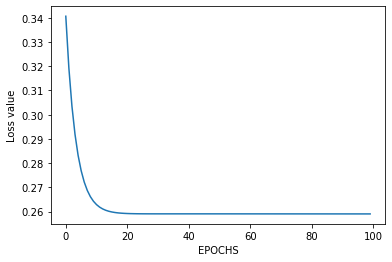

In [6]:
# Implementacion de los bucles

for epoch in range(n_epochs):
    for i,x in enumerate(x_in):
        a11,a12,y_hat = forward_propagation(x,b)
        err.append(y_out[i] - y_hat)
        dw11_1,dw12_1,dw21_1,dw22_1,dw11_2,dw12_2,db1_1,db2_1,db1_2 = backward_propagation(y_hat,y_out[i],a11,a12,w,x) 
        w[0] = w[0] - (alpha*dw11_1)
        w[1] = w[1] - (alpha*dw12_1)
        w[2] = w[2] - (alpha*dw21_1)
        w[3] = w[3] - (alpha*dw22_1)
        w[4] = w[4] - (alpha*dw11_2)
        w[5] = w[5] - (alpha*dw11_2)
        b[0] = b[0] - (alpha*db1_1)
        b[1] = b[1] - (alpha*db2_1)
        b[2] = b[2] - (alpha*db1_2)
        
    mse.append(0.25*np.sum(np.power(err,2)))
    err = []
    
plt.plot(mse)
plt.xlabel("EPOCHS")
plt.ylabel("MSE")
